# Calibration of the Meerssen subcatchment

The Meerssen subcatchment is calibrated for HBV in this Notebook. HBV is calibrated in combination with D-RR. This Notebook gives the calibration step by step.

## Import required packages

In [10]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import sys

## Locate the HBV model

In [14]:
workdir = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\HBV\HBV Kalibratie"

In [15]:
sys.path.insert(0,f'{workdir}\HBVmodel')

## Import the required HBV packages

The Calibration_rr includes the D-RR output in the lag function of HBV, Calibration does not.

In [16]:
from HBVMod_bmi import BmiHBV
from Forcing import Forcing
from Parameters import Parameters
#from Calibration import Calibration
from Calibration_rr import Calibration
from Validation import Validation
from Run import Run
from Plots import Calperiod_plot, Cal_plot, Cum_cal_plot, Dotty_plot, Valperiod_plot, Val_plot, Cum_val_plot

## Load the observations

In [17]:
Qobs = pd.read_excel(f'{workdir}\Meetdata/10Q36.xlsx',skiprows=4,index_col=[0],parse_dates=[0]) #read discharge data
Qobs.columns = ['Q']
Qobs.index.names = ['time']

In [18]:
Qobs_cal = Qobs['2019-01-01':'2020-07-01 00:00:00'] #Select the time period
Qobs_val = Qobs['2020-07-01':'2021-07-01 00:00:00']

## Define the upstream discharge

In [7]:
Qup1 = pd.read_excel(f'{workdir}\Meetdata/10Q30.xlsx',skiprows=4,index_col=[0],parse_dates=[0]) #read discharge data
Qup1.columns = ['Q']
Qup1.index.names = ['time']
Qup1_cal = Qup1['2019-01-01':'2020-07-01 00:00:00'] #Select the time period
Qup1_val = Qup1['2020-07-01':'2021-07-01 00:00:00'] #Select the time period

Qup2 = pd.read_excel(f'{workdir}\Meetdata/11Q32.xlsx',skiprows=4,index_col=[0],parse_dates=[0]) #read discharge data
Qup2.columns = ['Q']
Qup2.index.names = ['time']
Qup2_cal = Qup2['2019-01-01':'2020-07-01 00:00:00'] #Select the time period
Qup2_val = Qup2['2020-07-01':'2021-07-01 00:00:00'] #Select the time period

Qup3 = pd.read_excel(f'{workdir}\Meetdata/12Q31.xlsx',skiprows=4,index_col=[0],parse_dates=[0]) #read discharge data
Qup3.columns = ['Q']
Qup3.index.names = ['time']
Qup3_cal = Qup3['2019-01-01':'2020-07-01 00:00:00'] #Select the time period
Qup3_val = Qup3['2020-07-01':'2021-07-01 00:00:00'] #Select the time period

Qup4 = pd.read_excel(f'{workdir}\Meetdata/13Q34.xlsx',skiprows=4,index_col=[0],parse_dates=[0]) #read discharge data
Qup4.columns = ['Q']
Qup4.index.names = ['time']
Qup4_cal = Qup4['2019-01-01':'2020-07-01 00:00:00'] #Select the time period
Qup4_val = Qup4['2020-07-01':'2021-07-01 00:00:00'] #Select the time period

In [8]:
Qup_cal = Qup1_cal + Qup2_cal + Qup3_cal + Qup4_cal
Qup_val = Qup1_val + Qup2_val + Qup3_val + Qup4_val

## Plot the upstream discharge

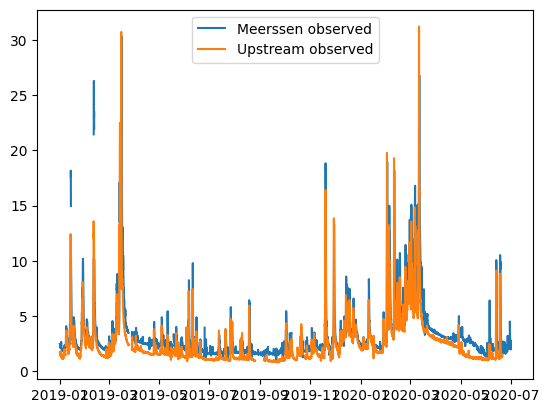

In [9]:
plt.plot(Qobs_cal,label='Meerssen observed')
plt.plot(Qup_cal,label='Upstream observed')
plt.legend()

## Define the corresponding D-RR output

In [10]:
Qrr_cal = pd.read_csv(f'{workdir}\D-HYDRO RR\Added_cities\RR_Calibration_Result.csv',index_col=[0],parse_dates=[0])
Qrr_cal = Qrr_cal['Meerssen']

Qrr_val = pd.read_csv(f'{workdir}\D-HYDRO RR\Added_cities\RR_Validation_Result.csv',index_col=[0],parse_dates=[0])
Qrr_val = Qrr_val['Meerssen']

## Define the forcing

In [11]:
forcing_cal = Forcing(f'{workdir}\Forcing\Cal_Precipitation.csv',f'{workdir}\Forcing\Cal_Evaporation.csv','Meerssen')
forcing_val = Forcing(f'{workdir}\Forcing\Val_Precipitation.csv',f'{workdir}\Forcing\Val_Evaporation.csv','Meerssen')

## Define the parameter intervals

HBV is calibrated by the Monte-Carlo method with the parameter intervals. The intervals can be adjusted to improve the result. More information is given in the report.

In [12]:
          #      Imax    Ce    Sumax  beta   Pmax   Tlag    Kf     Ks
Parmin = np.array([1.02,  0.1,  168,     2,   0.002,   16,   0.05,  0.0390])
Parmax = np.array([2.87,  0.5,  280,    10,     0.1,   60,   0.1,  0.0476])

## Define the initial storages

In [13]:
Sin = [0 , 100, 0, 5]

## Define the subcatchment area

In [14]:
area = 81.0

## Define the calibration and validation period and their corresponding warm-up period

In [15]:
#             Begin warm-up         Start calibration       End calibration
cal_period = ['2019-01-01 00:00:00','2020-01-01 00:00:00','2020-07-01 00:00:00']
val_period = ['2020-07-01 00:00:00','2021-01-01 00:00:00','2021-07-01 00:00:00']

## Define the number of Monte-Carlo runs

In [16]:
nmax = 10000

## Define the minimum NSE value

In [17]:
nsemin = 0.7

## Run the calibration

The NSE is calculated for each Monte-Carlo run. The current run is printed to keep track of the calibration.

In [18]:
cal = Calibration(Parmin,Parmax,Sin,area,forcing_cal,Qobs_cal,Qup_cal,Qrr_cal,cal_period,nmax,nsemin)

## Select the run with the highest NSE value

In [19]:
index = (cal.C[:,8]).argmax()

In [20]:
Optpar = cal.C[index,0:8]
Optpar

array([1.78048484e+00, 2.75583098e-01, 2.76435621e+02, 7.51919785e+00,
       6.77726705e-02, 3.33786224e+01, 6.43277802e-02, 4.49564462e-02])

## Define the optimum parameterset

In [21]:
par = Parameters(Optpar,Sin,area)

## Run HBV with the optimum parameterset

In [22]:
run = Run(par,forcing_cal,Qobs_cal,Qrr_cal,Qup_cal)

## Plot the calibration HBV run of the optimum parameterset

### Including warm-up period

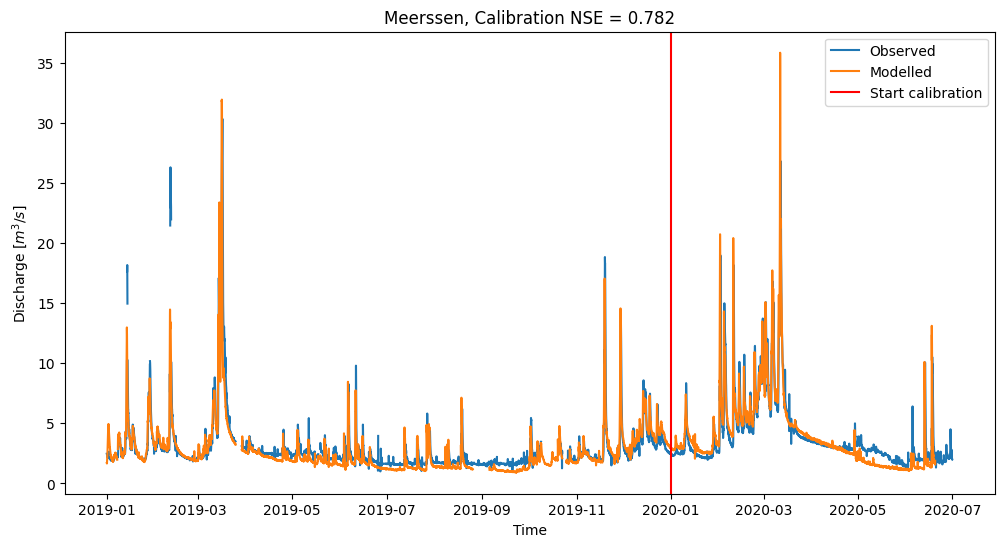

In [23]:
Calperiod_plot(cal,run,cal_period,'Meerssen')

### Excluding warm-up period

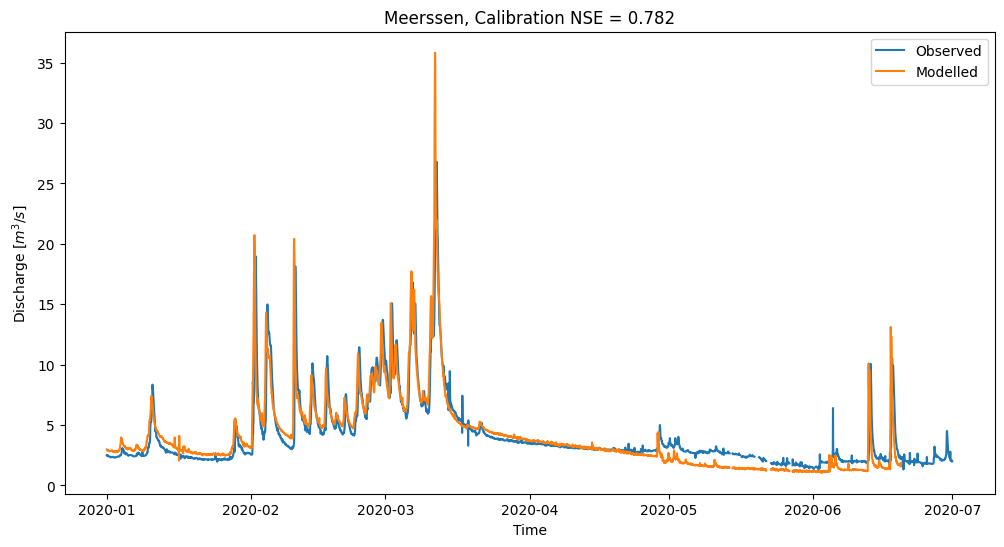

In [24]:
Cal_plot(cal,run,cal_period,'Meerssen')

## Plot cumulative discharge of the calibration period, excluding warm-up period

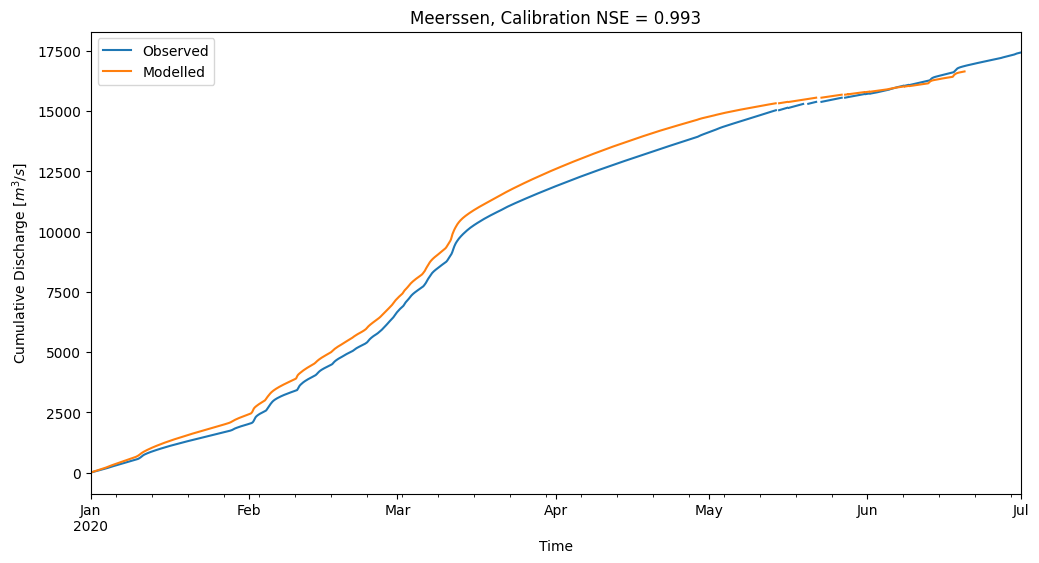

In [25]:
Cum_cal_plot(cal,run,cal_period,'Meerssen')

## Plot the dotty plots

The dotty plots show the NSE value corresponding to the parameter value. The parameter intervals can be adjusted by reading these plots.

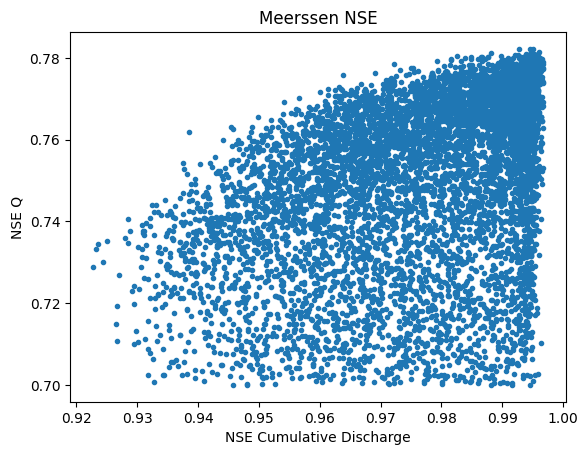

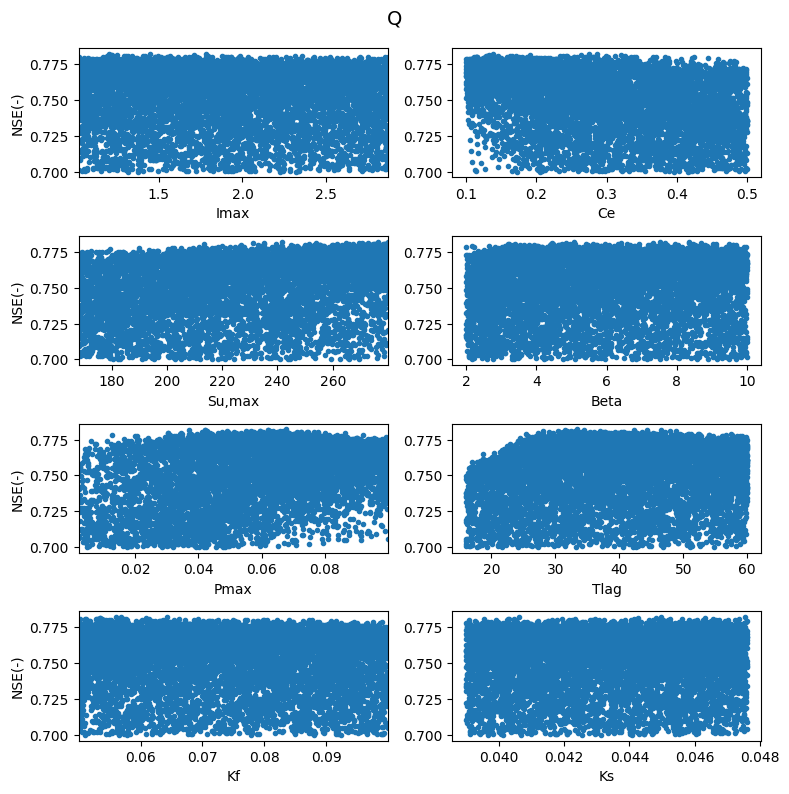

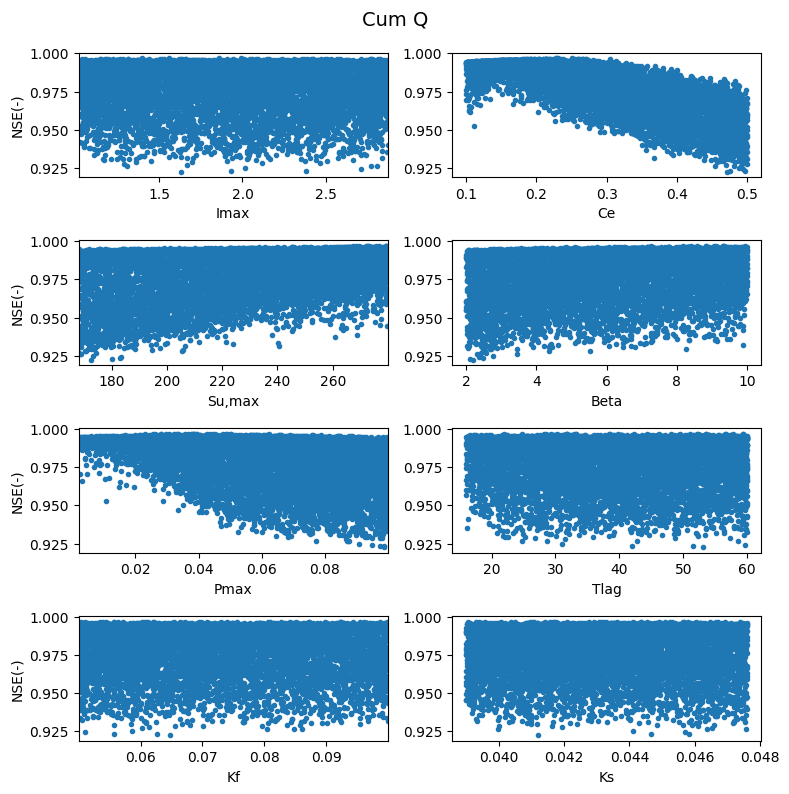

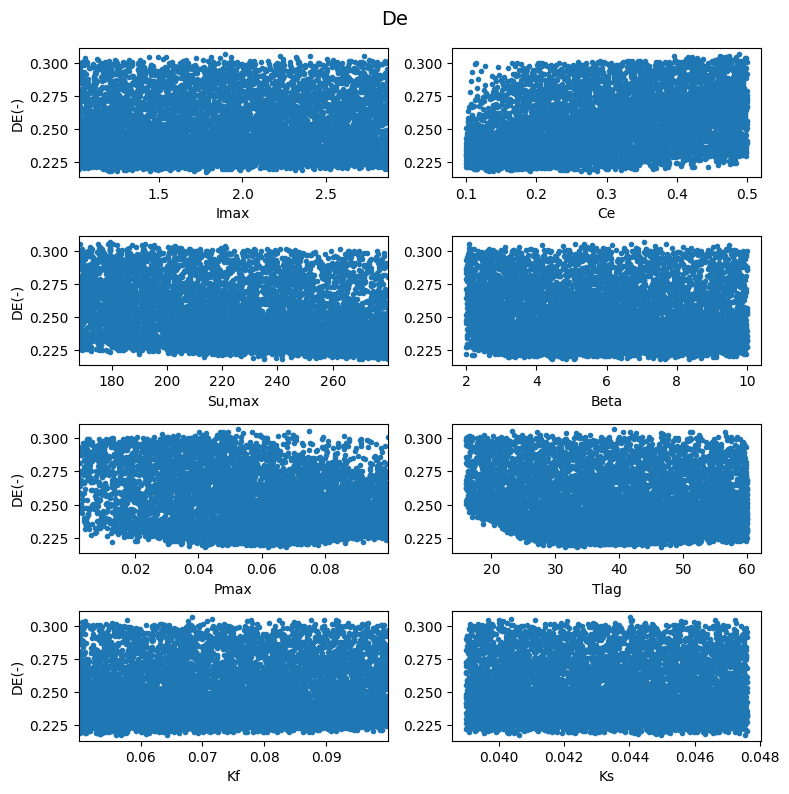

In [26]:
Dotty_plot(cal,run,cal_period,'Meerssen')

## Run HBV for the validation period with the optimum parameterset

In [27]:
val = Validation(Optpar,Sin,area,forcing_val,Qobs_val,Qup_val,Qrr_val,val_period)

## Plot the validation run

### Including warm-up period

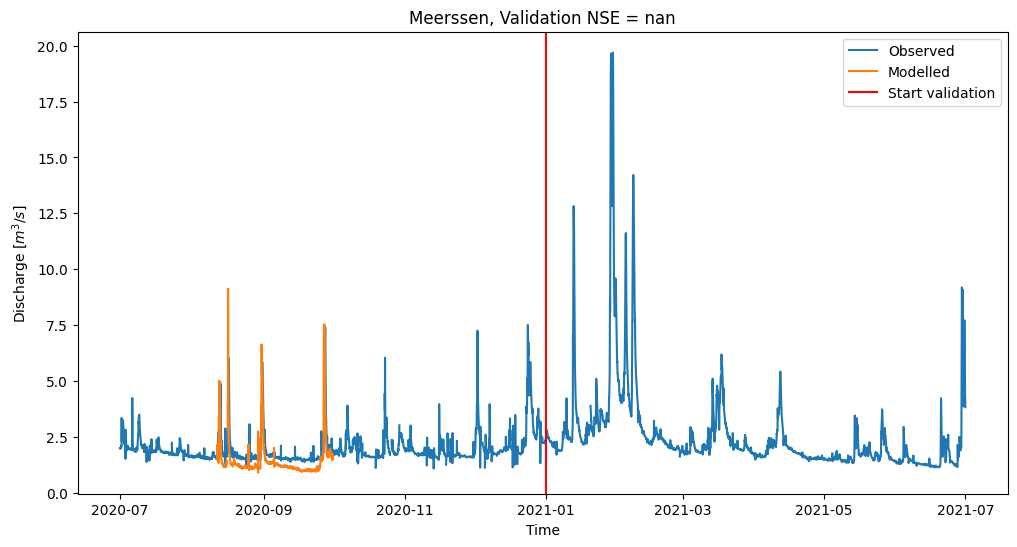

In [28]:
Valperiod_plot(val,val_period,'Meerssen')

### Excluding warm-up period

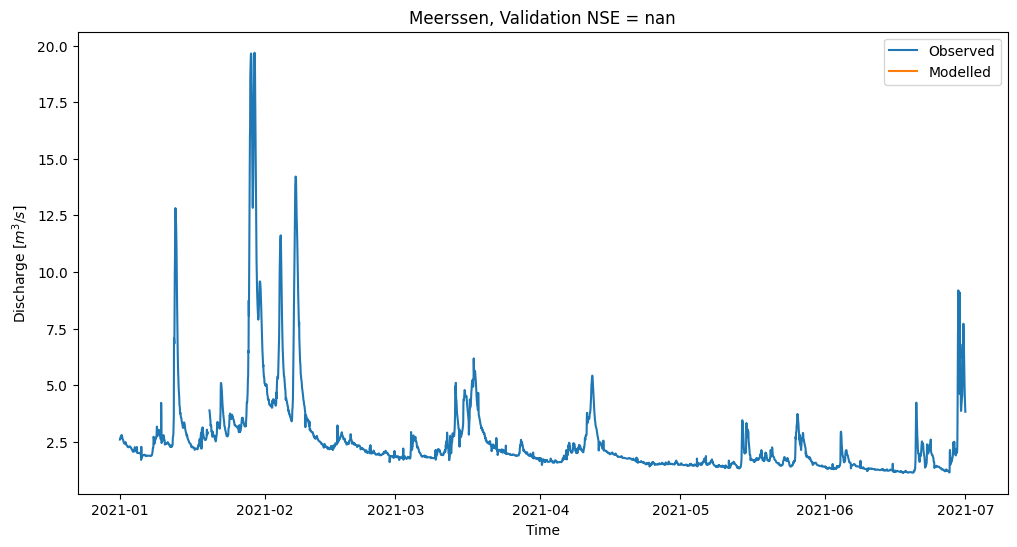

In [29]:
Val_plot(val,val_period,'Meerssen')

## Plot cumulative discharge of the validation period, excluding warm-up period

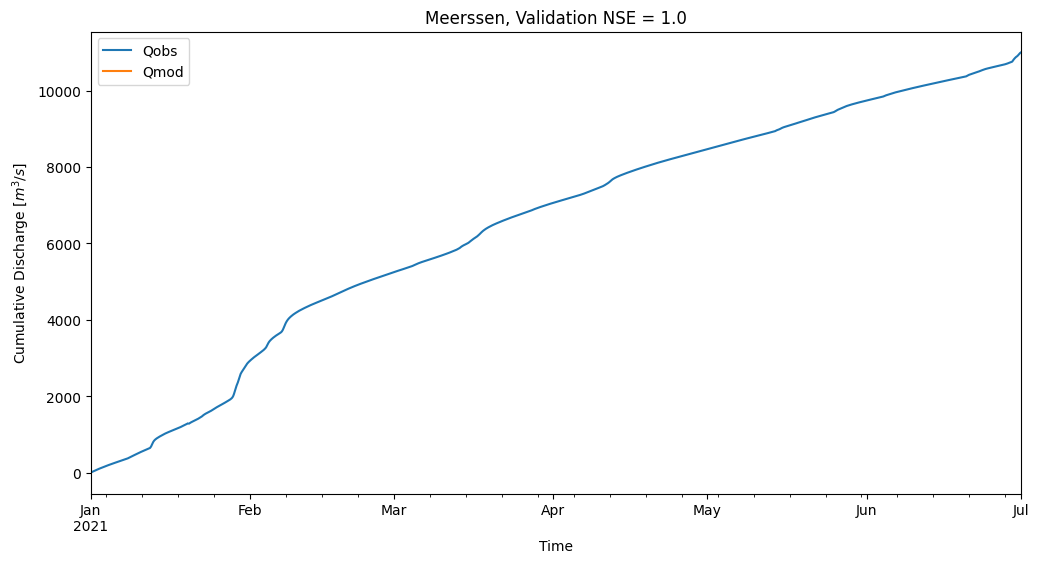

In [30]:
Cum_val_plot(val,val_period,'Meerssen')

<Axes: xlabel='time'>

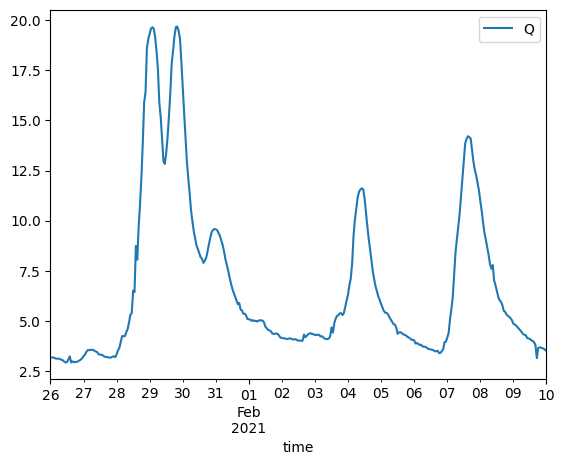

In [29]:
Qobs_val['2021-01-26':'2021-02-10 00:00:00'].plot()

In [30]:
len(Qobs_val['2021-01-26':'2021-02-10 00:00:00'])

361

In [34]:
len(Qobs_val['2021-01-11':'2021-02-10 00:00:00'])

721

In [37]:
(361-1)*3600

1296000